'control stack'
'max control'
'max-0'
'max-1'
'max-2'
'max-3'
'min control'
'min-0'
'min-1'
'min-2'
'min-3'
'diff control'
'diff-0'
'diff-1'
'diff-2'
'diff-3'
'mean control'
'mean-0'
'mean-1'
'mean-2'
'mean-3'
'pattern stack'
'entry'
'exit'
'stop loss'
'timeout'


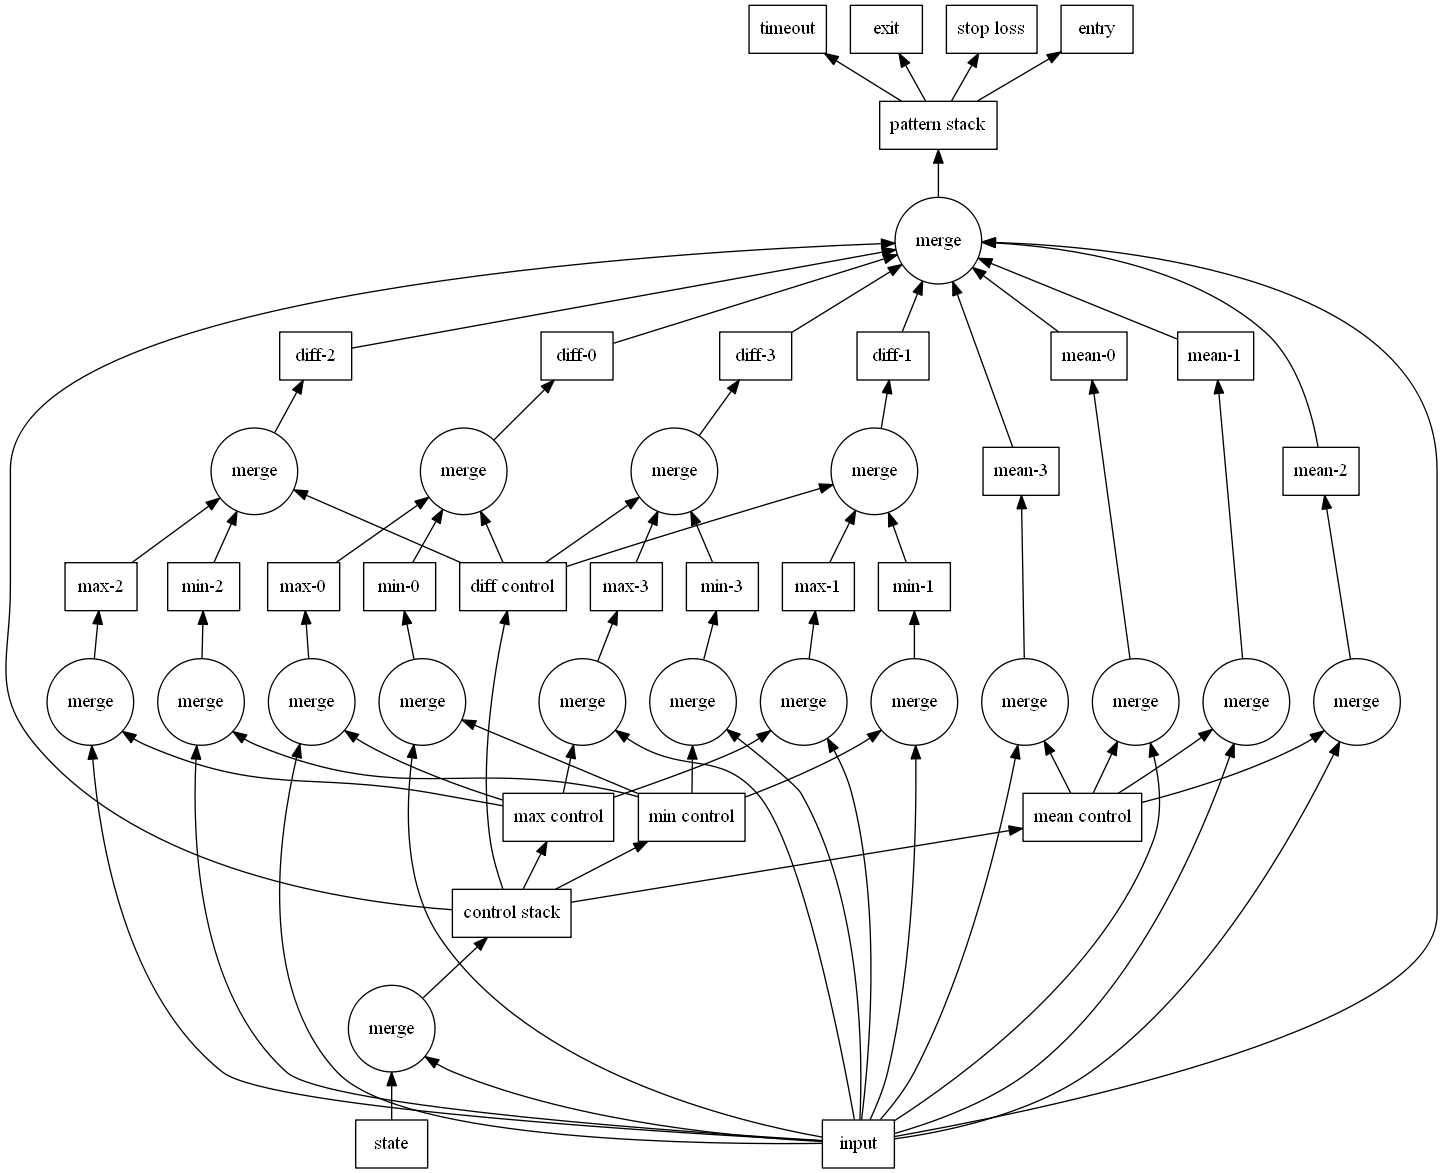

In [1]:
import dask.array as da
import numpy as np
from dask.dot import dot_graph
from dask import delayed
from dask.threaded import get
from functools import partial
from time import sleep
import dask

def merge(*args,time=0):
    '''time is in days to do task'''
    sleep(time/100.)
    #print(args)
    return args

n = 4
dsk = {'input':'input_',
      'state':'state_',
       'control stack':(merge,'state','input'),
       'min control':'control stack',
       'max control':'control stack',
       'mean control':'control stack',
       'diff control':'control stack',
       'pattern stack':(merge,'input','control stack',['diff-{}'.format(i) for i in range(n)],['mean-{}'.format(i) for i in range(n)]),
      'entry':'pattern stack',
      'exit':'pattern stack',
      'stop loss':'pattern stack',
      'timeout':'pattern stack'}
for i in range(n):
    dsk['diff-{}'.format(i)] = (merge,'min-{}'.format(i),'max-{}'.format(i),'diff control')
    dsk['min-{}'.format(i)] = (merge,'input','min control')
    dsk['max-{}'.format(i)] = (merge,'input','max control')
    dsk['mean-{}'.format(i)] = (merge,'input','mean control')

from dask.callbacks import Callback
class PrintKeys(Callback):
    def _pretask(self, key, dask, state):
        """Print the key of every task as it's started"""
        print("{0}".format(repr(key)))
with PrintKeys():
    dask.get(dsk,['entry','exit','stop loss','timeout'])
dot_graph(dsk,filename="ValueRangeNetwork",format='pdf')
dot_graph(dsk)


#dot_graph(dsk,filename="Roadmap to URSI",format="svg")


'max-0'
'min-0'
'diff-0'
'max-1'
'min-1'
'diff-1'
'max-2'
'min-2'
'diff-2'
'max-3'
'min-3'
'diff-3'
'mean-0'
'mean-1'
'mean-2'
'mean-3'
'pattern stack'
'entry'


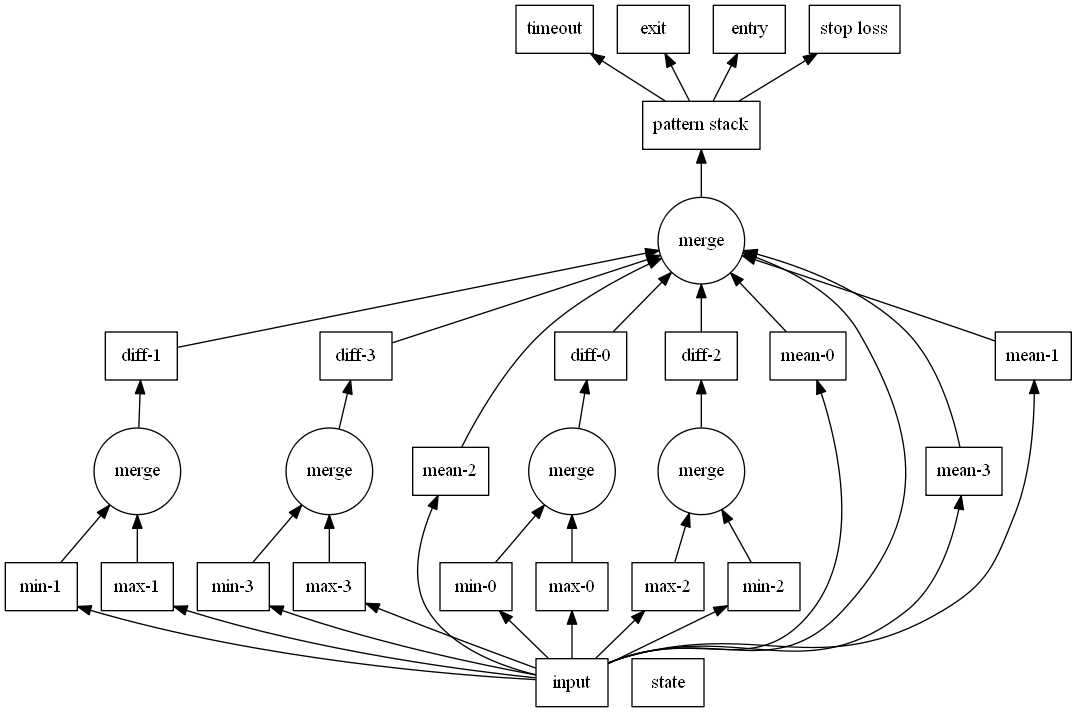

In [2]:
import dask.array as da
import numpy as np
from dask.dot import dot_graph
from dask import delayed
from dask.threaded import get
from functools import partial
from time import sleep
import dask

def merge(*args,time=0):
    '''time is in days to do task'''
    sleep(time/100.)
    #print(args)
    return args

n = 4
dsk = {'input':'input_',
      'state':'state_',

       'pattern stack':(merge,'input',['diff-{}'.format(i) for i in range(n)],['mean-{}'.format(i) for i in range(n)]),
      'entry':'pattern stack',
      'exit':'pattern stack',
      'stop loss':'pattern stack',
      'timeout':'pattern stack'}
for i in range(n):
    dsk['diff-{}'.format(i)] = (merge,'min-{}'.format(i),'max-{}'.format(i))
    dsk['min-{}'.format(i)] = 'input'
    dsk['max-{}'.format(i)] = 'input'
    dsk['mean-{}'.format(i)] = 'input'

from dask.callbacks import Callback
class PrintKeys(Callback):
    def _pretask(self, key, dask, state):
        """Print the key of every task as it's started"""
        print("{0}".format(repr(key)))
with PrintKeys():
    dask.get(dsk,['entry'])
dot_graph(dsk,filename="ValueRangeNetwork-task0",format='pdf')
dot_graph(dsk)


#dot_graph(dsk,filename="Roadmap to URSI",format="svg")
